# Decision Tree Classifier 

## Imports

In [2]:
# Import Metrics, Classifier and Graphing Packages
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

import seaborn as sns # for confusion matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # to plot image, graph

import pickle
import time # for computation time assessment
%matplotlib inline

## Prepare Dataset
### Pickle Dataset

In [3]:
# LOAD FEATURES AND LABELS FROM PICKLE

# Note: Pickles are mask, no mask, incorrect wear of mask dataset in grayscale
# See data pre-processing for more information

pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in) # 3D Feature set

pickle_in = open("y.pickle", "rb")
y = pickle.load(pickle_in) # 1D Target set

pickle_in = open("data.pickle", "rb")
data = pickle.load(pickle_in) # 2-D Feature Set, Data matrix will serve as X

## Dataset Classification Distribution

In [4]:
# Dataset class distribution for mask, no mask, incorrect wear of mask

print('# of Samples:', len(y))
print('# of Correctly Worn Mask:', (y == 0).sum())
print('# of Incorrectly Worn Mask:', (y == 1).sum())

# of Samples: 20905
# of Correctly Worn Mask: 10471
# of Incorrectly Worn Mask: 10434


## Convert Numpy to Dataframe

In [5]:
# Get Column Names
cols = []
for i in range(0, len(data[0])):
    cols.append("P" + str(i))

# Convert to Dataframe
numpy_data = data
X = pd.DataFrame(data=numpy_data, columns=[cols])
print(X.head())

y = pd.DataFrame(data=y, columns=["Mask_Target"])
print(y.head())

    P0   P1   P2   P3   P4   P5   P6   P7   P8   P9  ... P4086 P4087 P4088  \
0  198  197  199  203  199  201  197  196  191  191  ...    48    45    47   
1    0    0    0    0    0    0    0    0    0    0  ...     0     0     0   
2   43   39   34   39   43   37   44   41   36   32  ...    56    36    59   
3  216  217  217  219  218  218  219  222  221  219  ...   201   200   200   
4  226  225  213  193  177   88  198  236  235  238  ...    72    98    51   

  P4089 P4090 P4091 P4092 P4093 P4094 P4095  
0    45    44    46    59   208    50   168  
1     0     0     0     0     0     0     0  
2    54    39    50    60    48    60    60  
3   200   201   205   201   195   201   204  
4    71   160    76    90    71    34    34  

[5 rows x 4096 columns]
   Mask_Target
0            0
1            0
2            0
3            0
4            0


## Data Shape

In [6]:
# Shape of Feature and Target Sets
# There are 17,687 samples
# See Data preprocessing for more information

print('Image Data Shape:', X.shape) # Feature sets are 64X64 images flatten to a 4096 feature vector
print('Image Data Shape Features:', data.shape)
print('Image Data Shape Target:', y.shape)


Image Data Shape: (20905, 4096)
Image Data Shape Features: (20905, 4096)
Image Data Shape Target: (20905, 1)


## Normalize the Data

In [7]:
# Normalize the pixel values
X = X / 255.0

## Split Train + Test, random_state

In [8]:
# Split our data into testing and training.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

# Print the length and width of our testing data.
print('Length of our Training data: ', len(X_train), '\nLength of our Testing data: ', len(X_test))

Length of our Training data:  16724 
Length of our Testing data:  4181


## Decision Trees Classifier 

### Fit Model

In [9]:
# Initialize Decision Trees model, No hyperparameter Tuning
decision_trees = DecisionTreeClassifier()

# Use training data to fit Decision Trees model
decision_trees.fit(X_train, y_train.values.ravel())

# Predict Train Data Labels
predictions_set = decision_trees.predict(X_test)

C:\Users\Teoh\.conda\envs\ResearchProject\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Teoh\.conda\envs\ResearchProject\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


## Predict

In [10]:
%%time
# Predict Train Data Labels
predictions_set = decision_trees.predict(X_test)


Wall time: 62 ms


C:\Users\Teoh\.conda\envs\ResearchProject\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


## Performance Evaluation

### Confusion Matrix

Text(0.5, 1.0, 'Accuracy Score: 0.9653193016024875')

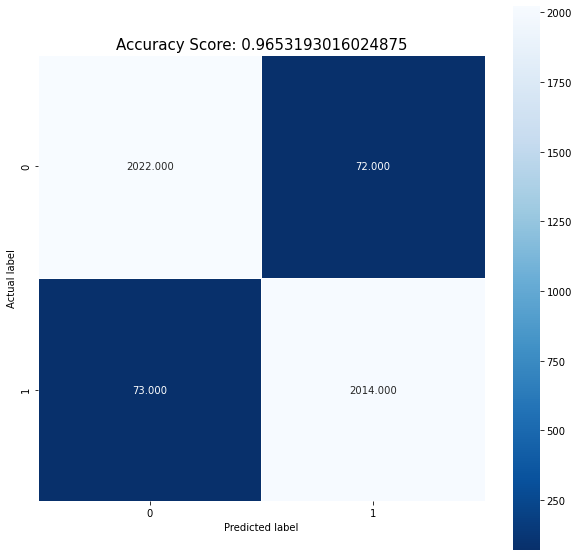

In [97]:
# Calculate Confusion Matrix
cm = confusion_matrix(y_test, predictions_set)

plt.figure(figsize=(10,10))
# Heatmap visualization of accuracy
sns.heatmap(cm,annot=True, fmt='.3f', linewidths=.5, square=True,cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
title = 'Accuracy Score: {0}'.format(accuracy_score(y_test, predictions_set))
plt.title(title,size=15)

### Classification Report

In [18]:
# RECALL
# CLASS 0: CORRECT WEAR OF MASK
# CLASS 1: INCORRECT WEAR OF MASK

print("\nClassification Report\n", classification_report(y_test, predictions_set))


Classification Report
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      2094
           1       0.97      0.97      0.97      2087

    accuracy                           0.97      4181
   macro avg       0.97      0.97      0.97      4181
weighted avg       0.97      0.97      0.97      4181



## Visualization of Trees

[Text(140.12403214338255, 214.722, 'X[2655] <= 0.727\ngini = 0.5\nsamples = 16724\nvalue = [8377, 8347]'),
 Text(48.360011400970926, 209.286, 'X[3424] <= 0.52\ngini = 0.061\nsamples = 6893\nvalue = [216, 6677]'),
 Text(17.33677242190948, 203.85, 'X[2280] <= 0.769\ngini = 0.474\nsamples = 318\nvalue = [123, 195]'),
 Text(10.50713480115726, 198.414, 'X[2216] <= 0.8\ngini = 0.137\nsamples = 189\nvalue = [14, 175]'),
 Text(8.405707840925809, 192.978, 'X[2278] <= 0.824\ngini = 0.054\nsamples = 180\nvalue = [5, 175]'),
 Text(4.202853920462904, 187.542, 'X[2200] <= 0.839\ngini = 0.011\nsamples = 175\nvalue = [1, 174]'),
 Text(2.101426960231452, 182.106, 'gini = 0.0\nsamples = 174\nvalue = [0, 174]'),
 Text(6.304280880694357, 182.106, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(12.608561761388714, 187.542, 'X[3461] <= 0.084\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(10.50713480115726, 182.106, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(14.709988721620165, 182.106, 'gini = 

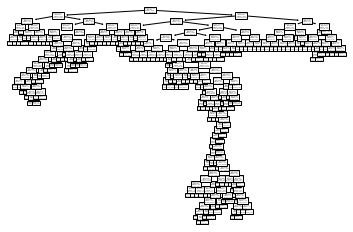

In [55]:
# Import Tree Plot for Visual Representation of Tree
from sklearn.tree import plot_tree
plot_tree(decision_trees) 

# Predict Image

In [94]:
import cv2

def predictImage(filename):
    img1 = cv2.imread(filename)
    plt.figure()
    plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
    img2 = cv2.imread(filename,cv2.IMREAD_GRAYSCALE)
    img_resized = cv2.resize(img2, (64,64))
    X = np.array(img_resized).flatten().reshape(1, 64*64)
    X = pd.DataFrame(data=X, columns=[cols])
    X = X / 255.0
    val = decision_trees.predict(X)
    #print(val)
    if val == 1:
        
        plt.xlabel("Incorrectly Worn",fontsize=30)
        
    
    elif val == 0:
        
        plt.xlabel("Correctly Worn",fontsize=30)

C:\Users\Teoh\.conda\envs\ResearchProject\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Teoh\.conda\envs\ResearchProject\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Teoh\.conda\envs\ResearchProject\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Teoh\.conda\envs\ResearchProject\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.

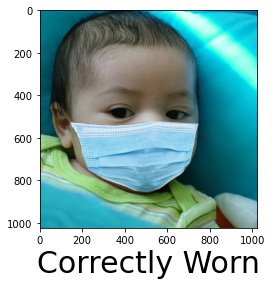

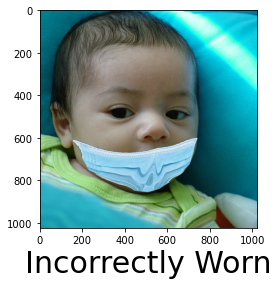

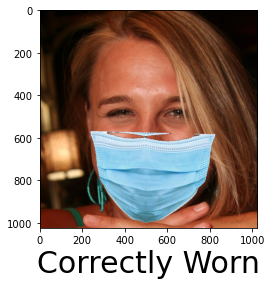

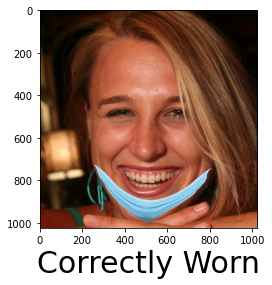

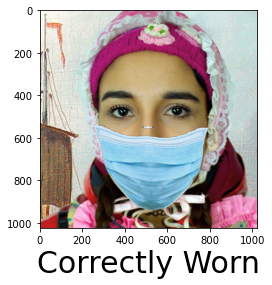

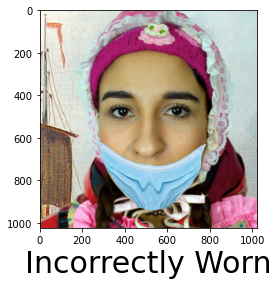

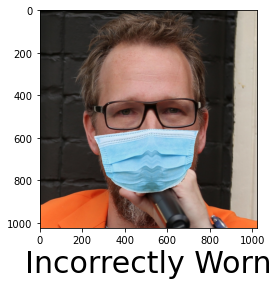

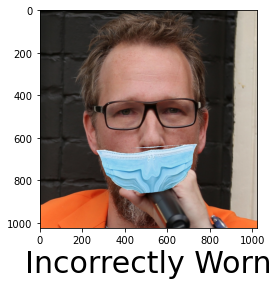

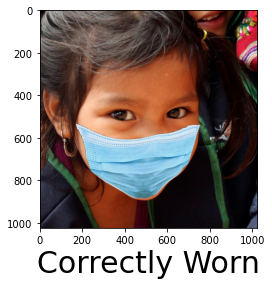

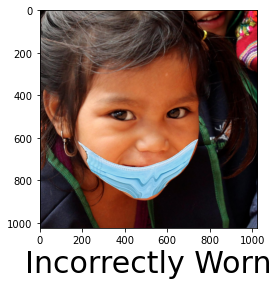

In [96]:
import os
path = "D:\\OneDrive - Universiti Malaya\\Work\Desktop\\UM Master of Data Science\\Sem 2\\3 - Machine Learning (WQD 7006)\\Assignment\\test"
for img in os.listdir(path):
    predictImage(os.path.join(path,img))